# Fauvet Field

**-Reference:** [Fauvet et al. (2012)](https://arxiv.org/abs/1201.5742) 

**-Orignal Implementation:** Hammurabi (old) [(code](https://sourceforge.net/projects/hammurabicode/), [paper)](https://arxiv.org/abs/0807.2262)

**-Default parameters constrained using (see reference publication):** simulated *Planck* data

In [9]:
import ImagineModels as img
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

def plotting_convenience(array, vec_dim, slice_dim, shp, rfp, inc):
    fig, ax = plt.subplots()
    dims = [0, 1, 2]
    dims.remove(slice_dim)
    
    dims_label = ['x', 'y', 'z']
    comp_label = dims_label[vec_dim]
    dims_label.remove(comp_label)

    slices = [slice(0, shp[0], None), slice(0, shp[1], None), slice(0, shp[2], None)]
    cut_index = int(shp[slice_dim]/2)
    slices[slice_dim] = slice(cut_index, cut_index +1, 1)
    slices = tuple(slices)
    
    ax.imshow(np.squeeze(array[vec_dim][slices]).T, cmap='RdBu_r', origin='lower', vmin=-6, vmax=6)
    
    xticks_label = [int(rfp[dims[0]] + i*shp[dims[0]]/5*inc[dims[0]]) for i in range(6)]
    xticks_loc = [i*shp[dims[0]]/5 for i in range(6)]
    yticks_label = [int(rfp[dims[1]] + i*shp[dims[1]]/5*inc[dims[1]]) for i in range(6)]
    yticks_loc = [i*shp[dims[1]]/5 for i in range(6)]
    
    ax.set_yticks(yticks_loc, labels=yticks_label)
    ax.set_ylabel("kpc")
    ax.set_xticks(xticks_loc, labels=xticks_label)
    ax.set_xlabel("kpc")
    
    ax.set_title(comp_label + " component in the  " + dims_label[0] + "-" + dims_label[1] + " plane")
    fig.colorbar(ax.images[0], orientation="horizontal")
    
    plt.show()
    plt.close()

#### 1. Visualizing the model

In [10]:
model = img.FauvetMagneticField()
shape = [100, 100, 20] # necessarily a list of 3 ints! 
increment = [.20, .20, .20]  
refpoint = [-10., -10., -2.]

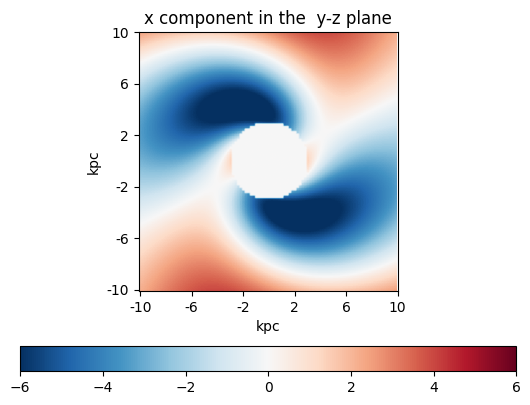

In [11]:
model_on_grid = model.on_grid(shape=shape, reference_point=refpoint, increment=increment)
plotting_convenience(model_on_grid, 0, 2, shape, refpoint, increment)

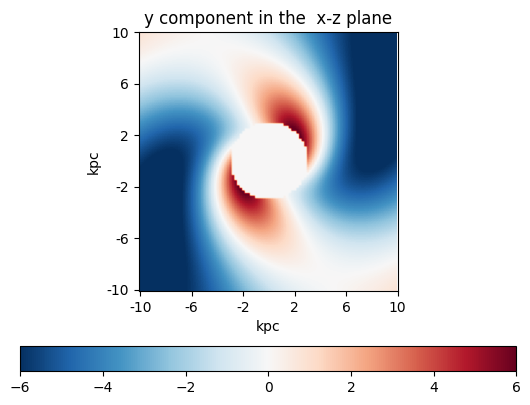

In [4]:
plotting_convenience(model_on_grid, 1, 2, shape, refpoint, increment)

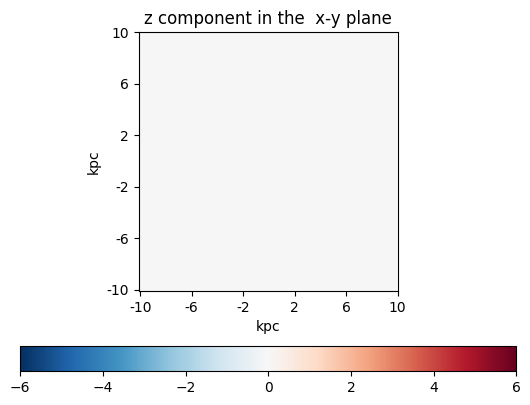

In [5]:
plotting_convenience(model_on_grid, 2, 2, shape, refpoint, increment)

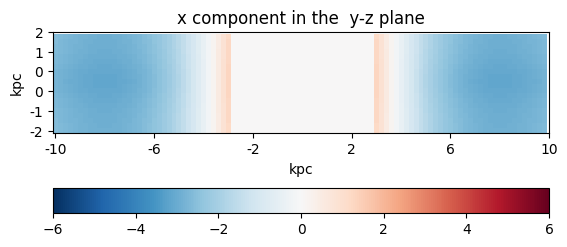

In [6]:
plotting_convenience(model_on_grid, 0, 1, shape, refpoint, increment)

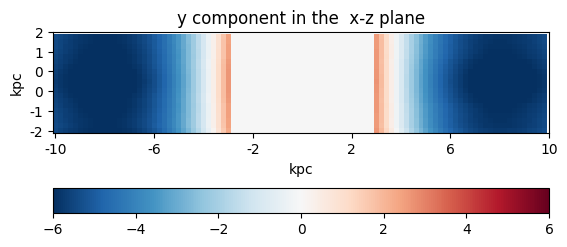

In [7]:
plotting_convenience(model_on_grid, 1, 1, shape, refpoint, increment)

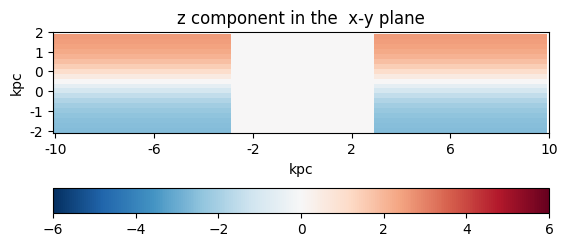

In [8]:
plotting_convenience(model_on_grid, 2, 1, shape, refpoint, increment)

### 2. The parameters

**TBD**